In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mean, age_median

(np.float64(29.69911764705882), np.float64(28.0))

In [4]:
df['Age'] = df['Age'].fillna(age_median)
df['Age'].isnull().sum()

np.int64(0)

In [5]:
mode_embarked = df['Embarked'].mode()[0]
mode_embarked

'S'

In [6]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
df['Embarked'].isnull().sum()

np.int64(0)

In [7]:
df['Cabin'].isna().mean() * 100

np.float64(77.10437710437711)

In [8]:
df = df.drop(columns=['Cabin'])
'Cabin' in df.columns

False

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

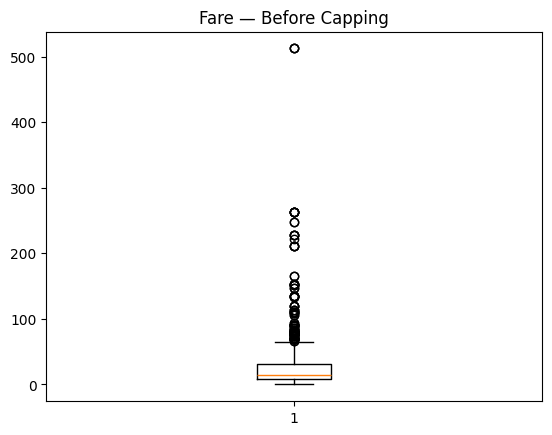

In [10]:
plt.boxplot(df['Fare'])
plt.title("Fare — Before Capping")
plt.show()

In [11]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_bound

np.float64(65.6344)

In [16]:
df.loc[df['Fare'] > upper_bound, 'Fare'] = upper_bound

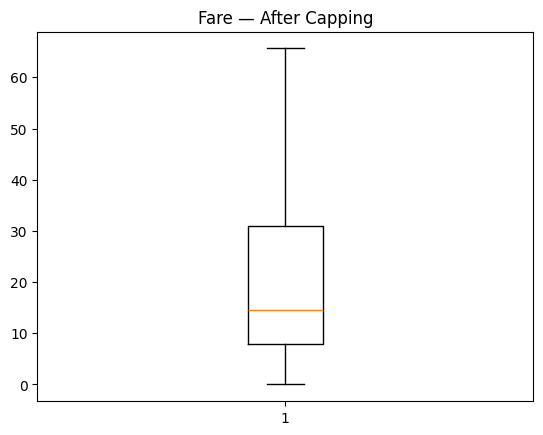

In [17]:
plt.boxplot(df['Fare'])
plt.title("Fare — After Capping")
plt.show()

### Exercise 3 — Country column cleaning

To clean the 'Country' column I would:

1. Convert all values to lowercase using .str.lower()
2. Remove punctuation such as '.' using .str.replace('.', '', regex=True)
3. Strip extra spaces using .str.strip()
4. Merge equivalent categories:
   - 'usa', 'united states', 'u.s.a', 'america' → 'usa'
5. Final clean categories: 'usa', 'canada', 'germany'